In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
sentences = [
['one', 'two', 'three'],
['three', 'four', 'five']
]

In [3]:
graph = nx.MultiGraph()

In [4]:
def get_new_word():
    sentence = sentences[random.randrange(0, len(sentences))]
    word = sentence[random.randrange(0, len(sentence))]
    print 'get new word returns : ', word
    return word

class WordObject():
    def __init__(self, word):
        self.word = word

def add_object_to_graph(graph, new_object):
    #add new word
    graph.add_node(new_object, word=new_object.word)
    return graph
    
def add_collision(graph, new_object):
    #get a random existing node for new word to 'collide' with
    collides_with_index = random.randrange(0, graph.number_of_nodes(), 1)
    collides_with = graph.nodes()[collides_with_index]
    #add edge between the two
    print 'add edge ', new_object.word, collides_with.word
    graph.add_edge(new_object, collides_with)
    return graph


In [22]:
for i in range(0, 20):
    word = get_new_word()
    new_object = WordObject(word)
    graph = add_object_to_graph(graph, new_object)
    word = get_new_word()
    new_object = WordObject(word)
    graph = add_object_to_graph(graph, new_object)
    graph = add_collision(graph, new_object)

get new word returns :  three
get new word returns :  three
add edge  three three
get new word returns :  three
get new word returns :  two
add edge  two three
get new word returns :  two
get new word returns :  five
add edge  five four
get new word returns :  three
get new word returns :  three
add edge  three two
get new word returns :  three
get new word returns :  one
add edge  one three
get new word returns :  one
get new word returns :  one
add edge  one two
get new word returns :  four
get new word returns :  three
add edge  three two
get new word returns :  three
get new word returns :  three
add edge  three one
get new word returns :  two
get new word returns :  three
add edge  three two
get new word returns :  five
get new word returns :  two
add edge  two one
get new word returns :  one
get new word returns :  five
add edge  five two
get new word returns :  two
get new word returns :  two
add edge  two four
get new word returns :  four
get new word returns :  five
add edge  

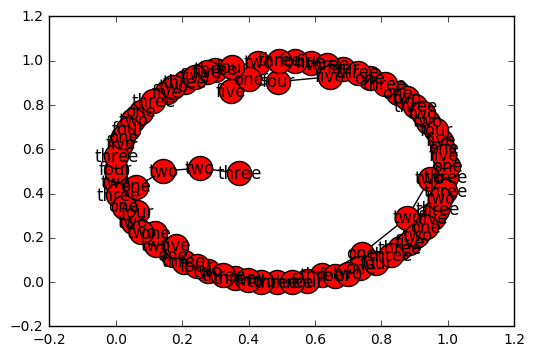

In [23]:
labels = nx.get_node_attributes(graph, 'word')
#print 'labels = ', labels
nx.draw_networkx(graph, labels=labels)
plt.show()

In [31]:

def look_through(potential_node, i, sentence):
    i += 1
    print 'looking through neighbors of ', potential_node, potential_node.word, 'i = ', i, ' looking for ', sentence[i]
    #get neighbors that have the next word in the sentence (sentence[i]) as the word attribute
    matching_children = [node for node in graph.neighbors(potential_node) if node.word == sentence[i]]
 
    if len(matching_children) > 0 and i+1 == len(sentence):
        print 'sentence found', sentence, matching_children[0]
        return [matching_children[0]]
    
    elif len(matching_children) == 0:
        print 'no matches'
        return None
    
    elif len(matching_children) > 0: 
        print 'matches found, start look_through again, i is ', i
        for child in matching_children:
            match = look_through(child, i, sentence)
            if match != None: 
                match.append(child)

for sentence in sentences:
    i = 0
    #get nodes that have first word as word attribute
    start_nodes = [node for node in graph.nodes() if node.word == sentence[i]] 
    for node in start_nodes:
        print 'start nodes, word is ', node.word
        match = look_through(node, i, sentence)
        if match != None:
            print 'match = ', match
            break


start nodes, word is  one
looking through neighbors of  <__main__.WordObject instance at 0x0000000008E79EC8> one i =  1  looking for  two
no matches
start nodes, word is  one
looking through neighbors of  <__main__.WordObject instance at 0x0000000009EB1588> one i =  1  looking for  two
matches found, start look_through again, i is  1
looking through neighbors of  <__main__.WordObject instance at 0x0000000008E79D88> two i =  2  looking for  three
sentence found ['one', 'two', 'three'] <__main__.WordObject instance at 0x0000000009EB1C48>
start nodes, word is  one
looking through neighbors of  <__main__.WordObject instance at 0x0000000009EB1F48> one i =  1  looking for  two
matches found, start look_through again, i is  1
looking through neighbors of  <__main__.WordObject instance at 0x0000000009EB1048> two i =  2  looking for  three
sentence found ['one', 'two', 'three'] <__main__.WordObject instance at 0x0000000008F90148>
start nodes, word is  one
looking through neighbors of  <__main__